In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class BellMouthSpillway(object):
    pass

In [27]:
# list with heights of water overflow in meters
h = np.arange(0.01, 0.42, 0.02)

# radius of the semicircular crown
r = 0.2

# depth of water
s = 1.4

# width of spillway in m
b = 6

# contraction coeff
Kpo = 0.1

# number of contractions
n = 2

In [28]:
def overflow_coeff_circ(h, r, s):
    """
    returns spillway coefficient for Bell Mouth Spilway
    input: overflow coefficient (overflow_coeff_circ) for spillway with halfcircular crown (float)
    output: float
    """
    overflow_coeffs = []
    for height in h:
        o = 1.02 - (1.015/(height/r + 2.08)) + (0.04 * (height/r + 0.19)**2 + 0.0223) * (r/s)
        overflow_coeffs.append(o)
    return overflow_coeffs

def spillway_coeff_bell(x):
    """
    returns spillway coefficient for Bell Mouth Spilway
    input: overflow coefficient (overflow_coeff_circ) for spillway with halfcircular crown (float)
    output: float
    """
    spillway_coeff = []
    for coeff in x:
        m = 2/3 * coeff
        spillway_coeff.append(m)
    return spillway_coeff

def actual_width_of_spillway(b, Kpo, n, h):
    """
    Returns width of the spillway enalarged by the contraction coefficient
    input:
        b - width of spillway
        n - number of contractions
        Kpo - contraction coefficient
        h - design height
    output:
        float - actual width of spillway
    """
    actual_width = []
    for height in h:
        width = b - (n * Kpo * height)
        actual_width.append(width)
    return actual_width
    

def consumption_curve(h, r, s, b, Kpo, n):
    """
    input:
    output:
    """
    m = spillway_coeff_bell(overflow_coeff_circ(h, r, s))
    b0 = actual_width_of_spillway(b, Kpo, n, h)
    
    x = pd.DataFrame(list(zip(h, b0, m)),
              columns=['Water Height (m)','Width (m)', 'Weir Coefficient (-)'])
    
    x['Flow (m3/s)'] = x['Weir Coefficient (-)'] * x['Width (m)'] * ((2*9.81)**0.5) * (x['Water Height (m)']**(3/2))
    
    return x
    

In [29]:
x = consumption_curve(h, r, s, b, Kpo, n)

In [30]:
x

,Water Height (m),Width (m),Weir Coefficient (-),Flow (m3/s)
0,0.01,5.998,0.364659,0.009688
1,0.03,5.994,0.379126,0.052304
2,0.05,5.990,0.392446,0.116416
3,0.07,5.986,0.404771,0.198766
4,0.09,5.982,0.416227,0.297776
5,0.11,5.978,0.426922,0.412423
6,0.13,5.974,0.436949,0.541951
7,0.15,5.970,0.446385,0.685757
8,0.17,5.966,0.455300,0.843342
9,0.19,5.962,0.463752,1.014280


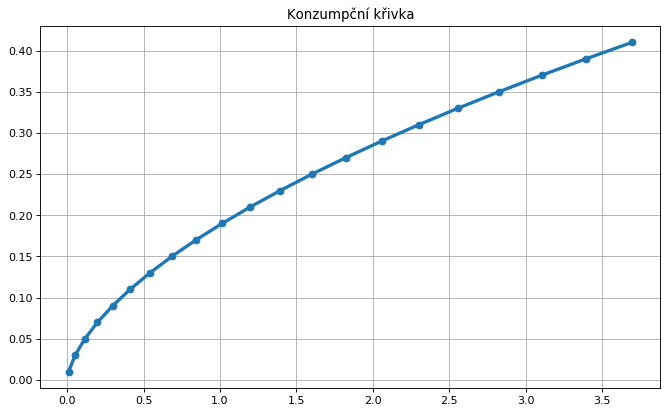

In [31]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x['Flow (m3/s)'], x['Water Height (m)'], marker='o', linewidth=3)
plt.title("Konzumpční křivka")
plt.grid(True)

In [32]:
circumference = b

In [33]:
r = circumference / math.pi

In [34]:
r

1.909859317102744

In [35]:
circumference

6

In [36]:
# critical depth

alfa = 1.05 # corriolis number
design_flow = 3 # m3/s
b_bottom = 2

crit_depth = math.pow(((alfa * design_flow) / (9.81 * b_bottom)), 1/3)

In [37]:
crit_depth

0.5435053835686162